In [1]:
import torch
import pandas as pd
import numpy as np
import seaborn as sns
import os
import re
sns.set(style="darkgrid")
import matplotlib.pyplot as plt
from glob import glob
%matplotlib inline


def do_plot(df, title):
    dfval = df[df["is_val"]]
    dftrain = df[df["is_val"] != True]
    sns.lineplot(x=dftrain.index, y="drmsd", data=dftrain, label="train-drmsd")
    sns.lineplot(x=dfval.index, y="drmsd", data=dfval, label="val-drmsd",color="lightblue")
    sns.lineplot(x=dftrain.index, y="rmsd", data=dftrain, label="train-rmsd")
    sns.lineplot(x=dfval.index, y="rmsd", data=dfval, label="val-rmsd", color="orange")
    sns.lineplot(x=dftrain.index, y="rmse", data=dftrain, label="rmse")
    plt.ylabel("Loss Value")
    plt.xlabel("Epoch")
    plt.legend(loc=(1.04,.7))
    plt.title("{} Training Loss".format(title))
#     plt.savefig("../figs/transtrain.pdf", pad_inches=1, bbox_inches="tight")


In [2]:
df = pd.read_csv("all_summary.csv").sort_values("rmsd-val")

In [3]:
df

,drmsd-train,rmse-train,rmsd-train,combined-train,drmsd-val,rmse-val,rmsd-val,combined-val,epoch_time,name,cmd_line
9,4.701070,2.204544,6.646344,1.508820,4.688903,2.214926,6.164411,1.519530,0.0,0613-q1-95935,python train.py data/data_190613_query1.tch 06...
25,4.686988,1.819737,6.024692,1.120798,4.826220,1.774635,6.322031,1.088971,0.0,0613-q1-5917,python train.py data/data_190613_query1.tch 06...
49,5.103546,1.895945,6.024759,1.217623,4.898451,1.815255,6.329972,1.129941,0.0,0613-q1-67351,python train.py data/data_190613_query1.tch 06...
8,4.905737,1.892451,6.139805,1.201951,4.669036,1.889620,6.338190,1.184481,0.0,0613-q1-60109,python train.py data/data_190613_query1.tch 06...
217,4.727449,1.817326,6.123970,1.121134,5.170566,1.822250,6.366433,1.153309,0.0,0613-q1-77006,python train.py data/data_190613_query1.tch 06...
0,3.523695,1.636465,5.898012,0.889735,4.417930,1.628933,6.404033,0.939476,0.0,0613-q1-7687,python train.py data/data_190613_query1.tch 06...
85,4.986489,1.847714,6.232218,1.165167,4.990208,1.865518,6.447687,1.181928,0.0,0613-q1-76430,python train.py data/data_190613_query1.tch 06...
11,6.243185,2.276430,7.773952,1.685733,4.695267,2.244662,6.476109,1.553081,0.0,0613-q1-63073,python train.py data/data_190613_query1.tch 06...
156,3.766011,1.676475,6.028174,0.938017,5.108229,1.654339,6.487981,1.003474,0.0,0613-q1-58088,python train.py data/data_190613_query1.tch 06...
176,4.081445,1.750969,5.601751,1.021563,5.129111,1.723416,6.489787,1.063110,0.0,0613-q1-8029,python train.py data/data_190613_query1.tch 06...


In [4]:
def get_arg_from_cmd(cmd_line, arg):
    if arg is "cl":
        return "-cl" in cmd_line
    if (arg is "cg" and "-cg" not in cmd_line):
        return np.inf
    pattern = f"-{arg} (\d+(e\-?\d+)?|0?\.\d+)($|\s|\b|\-\w)"
    try:
        return re.search(pattern, cmd_line).group(1)
    except AttributeError:
        if arg is 'cg':
            print(cmd_line)
        if re.search(pattern, cmd_line) is None:
            print(f"'{arg}' was not found as an argument.")
            

In [13]:
ARGLIST = ['b', 'cl', 'dm', 'nh', 'nl', 'dk', 'dv', 'cg', 'lr', 'do']

In [5]:
def get_args(s):
    d = {}
    for arg in ['b', 'cl', 'dm', 'nh', 'nl', 'dk', 'dv', 'cg', 'lr', 'do']:
        d[arg] = get_arg_from_cmd(s, arg)
    return d

In [6]:
df['args'] = df['cmd_line'].apply(get_args)

In [8]:
for i, row in df.iterrows():
    for a in ['b', 'cl', 'dm', 'nh', 'nl', 'dk', 'dv', 'cg', 'lr', 'do']:
        df.at[i,a] = row['args'][a]

In [10]:
del df["cmd_line"]
del df["args"]

In [31]:
df[:10]

,drmsd-train,rmse-train,rmsd-train,combined-train,drmsd-val,rmse-val,rmsd-val,combined-val,epoch_time,name,b,cl,dm,nh,nl,dk,dv,cg,lr,do
9,4.701070,2.204544,6.646344,1.508820,4.688903,2.214926,6.164411,1.519530,0.0,0613-q1-95935,2,True,22,6,1,20,52,1,0.0001,0
25,4.686988,1.819737,6.024692,1.120798,4.826220,1.774635,6.322031,1.088971,0.0,0613-q1-5917,2,True,256,4,2,8,8,inf,1e-05,0
49,5.103546,1.895945,6.024759,1.217623,4.898451,1.815255,6.329972,1.129941,0.0,0613-q1-67351,2,True,128,2,6,20,8,1,0.0001,0
8,4.905737,1.892451,6.139805,1.201951,4.669036,1.889620,6.338190,1.184481,0.0,0613-q1-60109,2,True,16,6,8,8,256,.5,1e-05,0
217,4.727449,1.817326,6.123970,1.121134,5.170566,1.822250,6.366433,1.153309,0.0,0613-q1-77006,4,True,256,1,4,20,20,1,1e-05,0
0,3.523695,1.636465,5.898012,0.889735,4.417930,1.628933,6.404033,0.939476,0.0,0613-q1-7687,2,True,16,6,1,8,8,.5,0.0001,0
85,4.986489,1.847714,6.232218,1.165167,4.990208,1.865518,6.447687,1.181928,0.0,0613-q1-76430,4,True,128,1,2,20,20,1,1e-05,0
11,6.243185,2.276430,7.773952,1.685733,4.695267,2.244662,6.476109,1.553081,0.0,0613-q1-63073,2,True,16,1,1,20,8,inf,0.001,0
156,3.766011,1.676475,6.028174,0.938017,5.108229,1.654339,6.487981,1.003474,0.0,0613-q1-58088,4,True,16,6,1,8,256,.5,0.0001,0
176,4.081445,1.750969,5.601751,1.021563,5.129111,1.723416,6.489787,1.063110,0.0,0613-q1-8029,2,True,512,6,1,8,8,1,1e-05,0


In [32]:
[str(s) for s in sorted([float(x) for x in set(df["dm"])])]

['8.0', '16.0', '22.0', '56.0', '128.0', '256.0', '512.0']

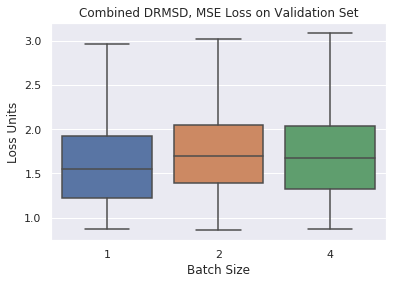

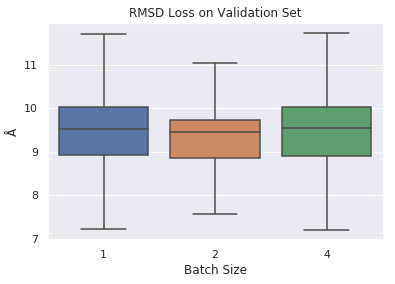

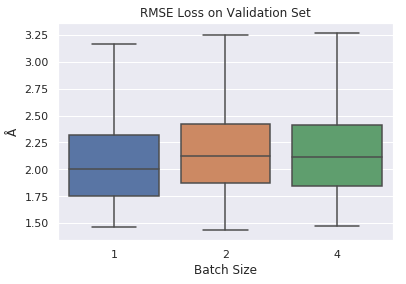

In [38]:
translator = {"b":"Batch Size", "dm": "Model Dimension", "nl":"Number of Layers", "nh":"Number of Heads"}
def do_loss_plots_on_var(d, var, swarm=True, fliers=False):
    if var in ["dm", 'dv', 'dk']:
        o = [str(s) for s in sorted([int(x) for x in set(df[var])])]
    elif var is "lr":
        o = o = [str(s) for s in sorted([float(x) for x in set(df[var])])]
    else:
        o = None
    if var in translator.keys():
        x = translator[var]
    else:
        x = var
    sns.boxplot(x=var, y="combined-val", data=d, showfliers=fliers, order=o)
    if swarm: sns.swarmplot(x=var, y="combined-val", data=d, color="black", order=o)
    plt.title("Combined DRMSD, MSE Loss on Validation Set")
    plt.ylabel("Loss Units")
    plt.xlabel(x)
    plt.savefig(f"combined_{var}.pdf")
    plt.figure()
    sns.boxplot(x=var, y="rmsd-val", data=d, showfliers=fliers, order=o)
    if swarm: sns.swarmplot(x=var, y="rmsd-val", data=d, color="black", order=o)
    plt.ylabel("Å")
    plt.title("RMSD Loss on Validation Set")
    plt.xlabel(x)
    plt.savefig(f"rmsd_{var}.pdf")
    plt.figure()
    sns.boxplot(x=var, y="rmse-val", data=d, showfliers=fliers, order=o)
    if swarm: sns.swarmplot(x=var, y="rmse-val", data=d, color="black", order=o)
    plt.ylabel("Å")
    plt.title("RMSE Loss on Validation Set")
    plt.xlabel(x)
    plt.savefig(f"rmse_{var}.pdf")

do_loss_plots_on_var(df, "b", swarm=False)

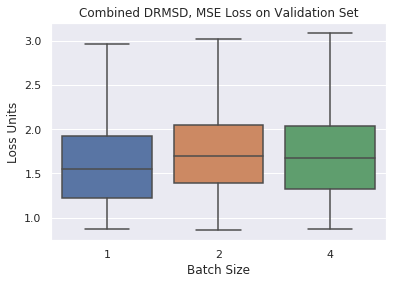

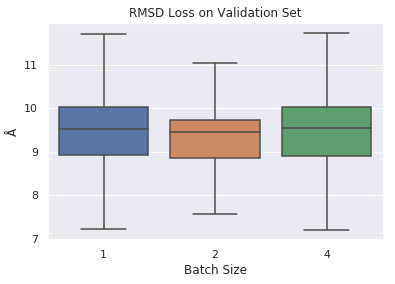

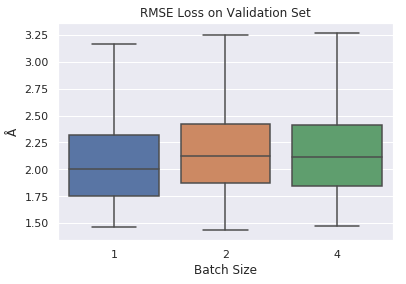

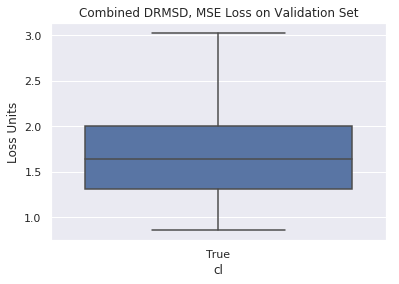

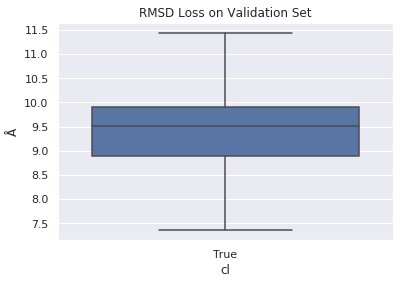

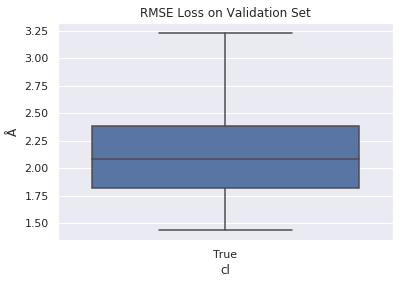

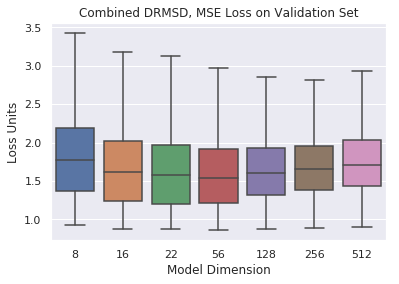

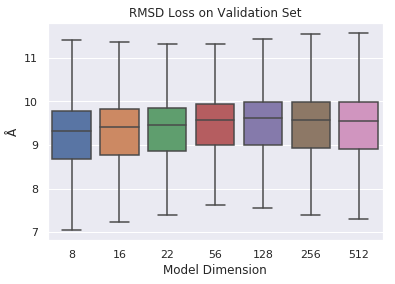

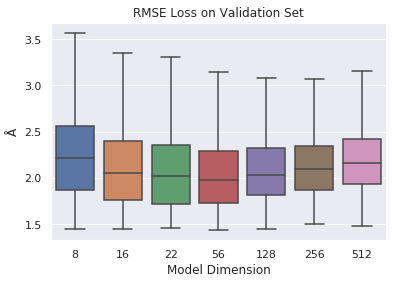

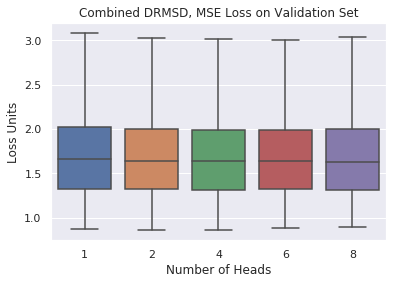

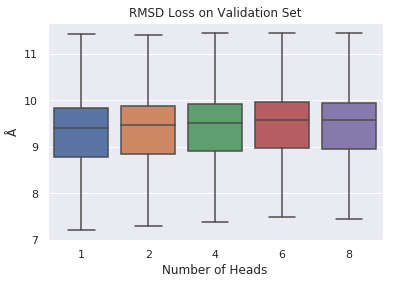

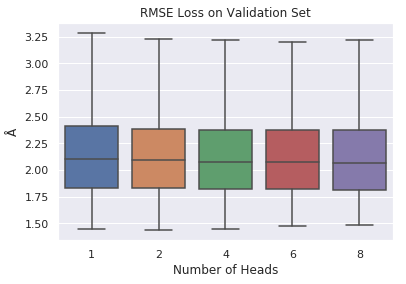

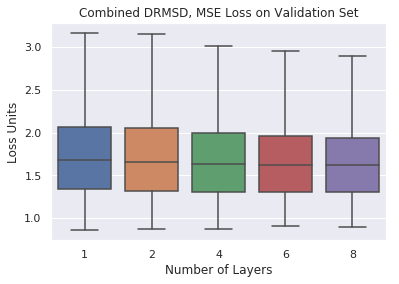

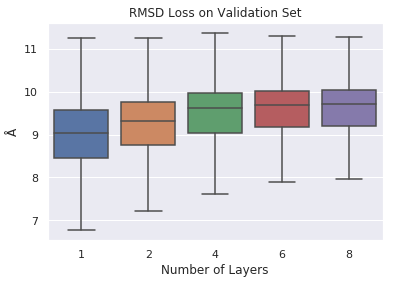

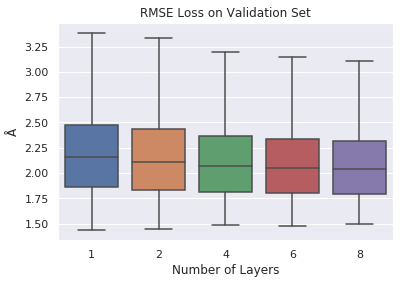

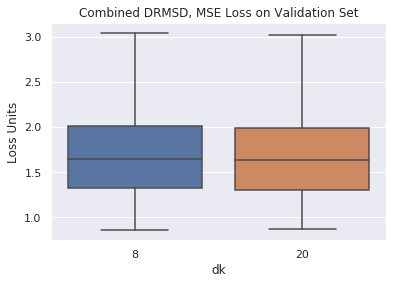

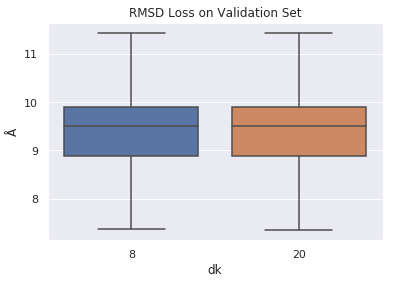

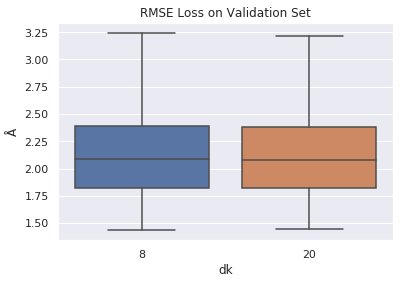

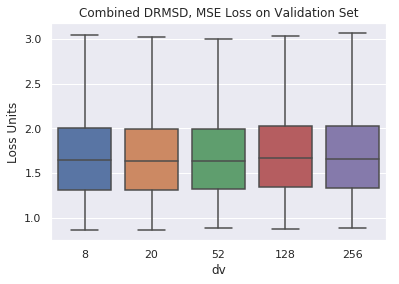

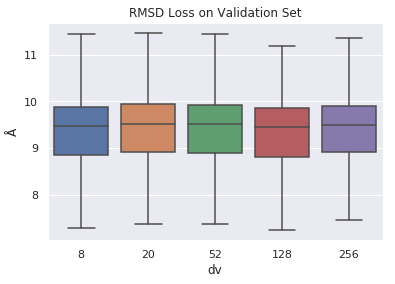

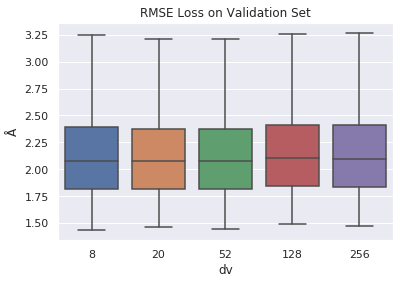

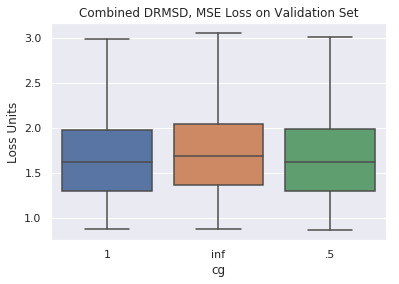

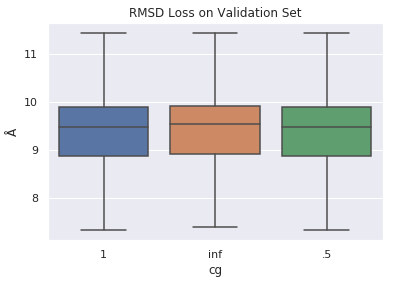

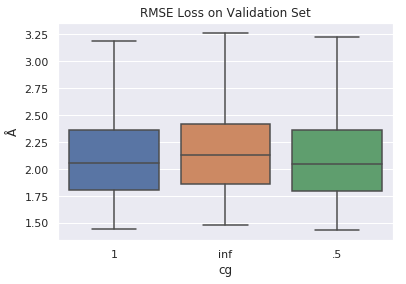

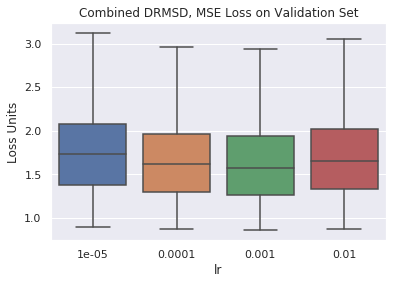

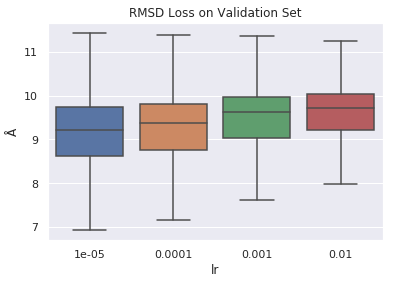

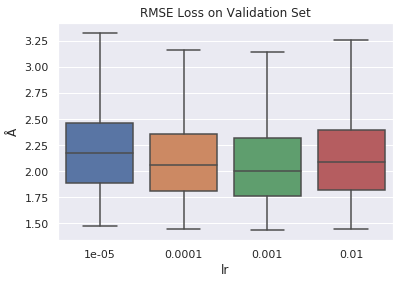

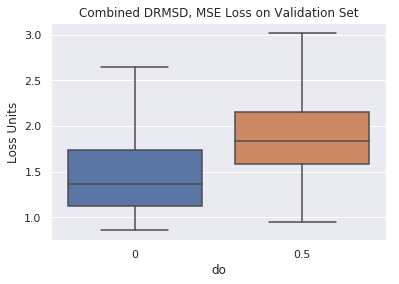

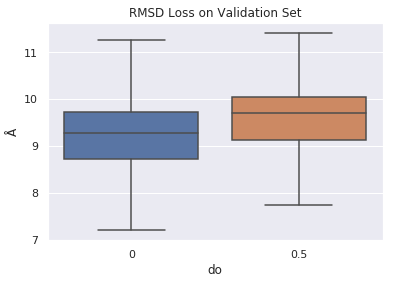

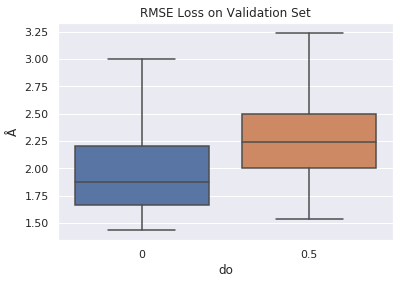

<Figure size 432x288 with 0 Axes>

In [39]:
for a in ARGLIST:
    do_loss_plots_on_var(df, a, swarm=False)
    plt.figure()